In [20]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

# Display the version
print(tf.__version__)

# import and mount Drive
import os
from google.colab import drive
drive.mount('/content/gdrive')

2.13.0
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [21]:
# get path to folder file is in
!pip install kora
from kora.drive import get_path
file_path = get_path('17rNCLBHSPszyoaacFSpsFGD5nlP1OBF7')
file_path = '/content/gdrive/' + str(file_path) + '/Fashion-MNIST'
print(file_path)

/content/gdrive/My Drive/Personal Projects/Pioneer Academics Research/code/Fashion-MNIST


In [22]:
# Download the data from tf, unless it's already here.
if not os.path.exists(file_path+'/data/clean'):
  os.mkdir(file_path+'/data/clean')
  (X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
  np.save(file_path+'/data/clean/X_train.npy',X_train)
  np.save(file_path+'/data/clean/y_train.npy',y_train)
  np.save(file_path+'/data/clean/X_test.npy',X_test)
  np.save(file_path+'/data/clean/y_test.npy',y_test)
else:
  X_train = np.load(file_path+'/data/clean/X_train.npy')
  y_train = np.load(file_path+'/data/clean/y_train.npy')
  X_test = np.load(file_path+'/data/clean/X_test.npy')
  y_test = np.load(file_path+'/data/clean/y_test.npy')

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [23]:
# Reduce pixel values
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# reshape dataset to have a single channel
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

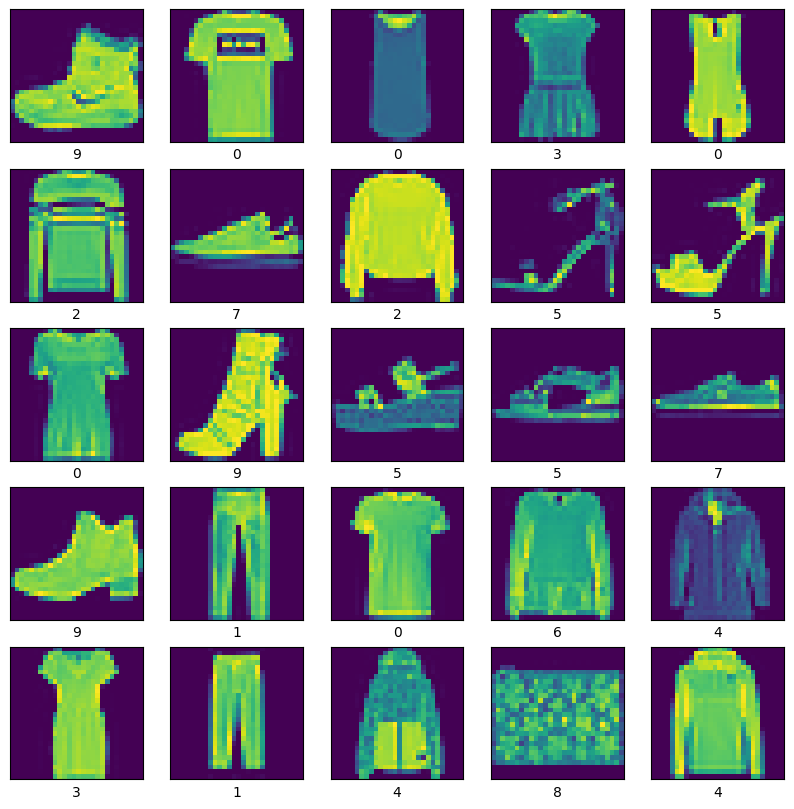

In [24]:
# Display training images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i])
plt.show()

In [25]:
# Implement the chosen values in a final model
def train(params=[64, 64, 128, 128, 256, 256], file_name=(file_path + '/models/clean.keras'), num_epochs = 50, lr = 0.0003, drop = 0.2, reg = 1e-4, batch_size=32):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(params[0], (3, 3), input_shape=X_train.shape[1:], padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(reg)))
    model.add(tf.keras.layers.MaxPooling2D())
    model.add(tf.keras.layers.Dropout(drop))

    model.add(tf.keras.layers.Conv2D(params[1], (3, 3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(reg)))
    model.add(tf.keras.layers.MaxPooling2D())
    model.add(tf.keras.layers.Dropout(drop))
    model.add(tf.keras.layers.Conv2D(params[2], (3, 3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(reg)))
    model.add(tf.keras.layers.MaxPooling2D())
    model.add(tf.keras.layers.Dropout(drop))
    model.add(tf.keras.layers.Conv2D(params[3], (3, 3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(reg)))
    model.add(tf.keras.layers.MaxPooling2D())
    model.add(tf.keras.layers.Dropout(drop))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(params[4], activation='relu', kernel_regularizer=tf.keras.regularizers.L2(reg)))
    model.add(tf.keras.layers.Dropout(drop))
    model.add(tf.keras.layers.Dense(params[5], activation='relu', kernel_regularizer=tf.keras.regularizers.L2(reg)))
    model.add(tf.keras.layers.Dropout(drop))
    model.add(tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.L2(reg)))

    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  metrics=['accuracy'])

    model.summary()

    model.fit(X_train, y_train,
              batch_size=batch_size,
              validation_split=0.1,
              epochs=num_epochs,
              shuffle=True,
              verbose=1)


    if file_name != None:
        model.save(file_name)

    return model

model = train()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 7, 7, 64)         

In [26]:
# Evaluate it on a set the model has never seen
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2981 - accuracy: 0.9259


[0.2981049120426178, 0.9258999824523926]